<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

<ipython-input-2-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [7]:
# your code goes here
import piplite
await piplite.install('seaborn')

<ipython-input-10-09bd7faa889d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'],hist=False)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

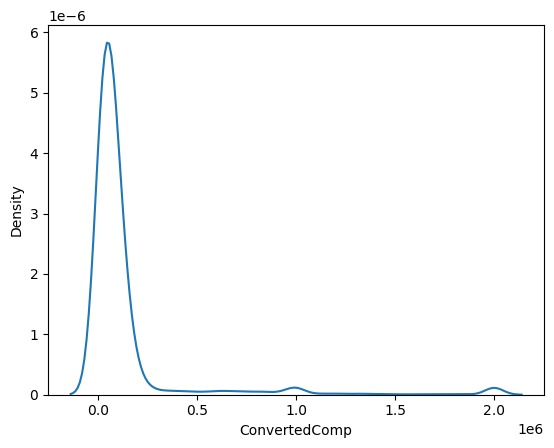

In [10]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['ConvertedComp'],hist=False)

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


<ipython-input-11-829a1f713d46>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)


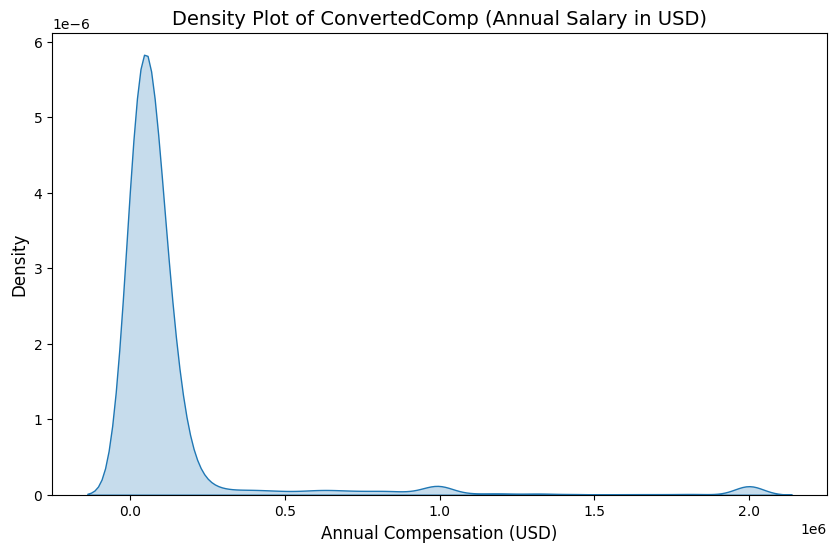

In [11]:
# your code goes here
# Describir cómo se distribuyen los datos en la columna 'ConvertedComp'
print(df['ConvertedComp'].describe())

# Trazar la curva de distribución suavizada para la columna 'ConvertedComp' sin histograma
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)

# Etiquetas y título
plt.title('Density Plot of ConvertedComp (Annual Salary in USD)', fontsize=14)
plt.xlabel('Annual Compensation (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Mostrar la gráfica
plt.show()

Plot the histogram for the column `ConvertedComp`.


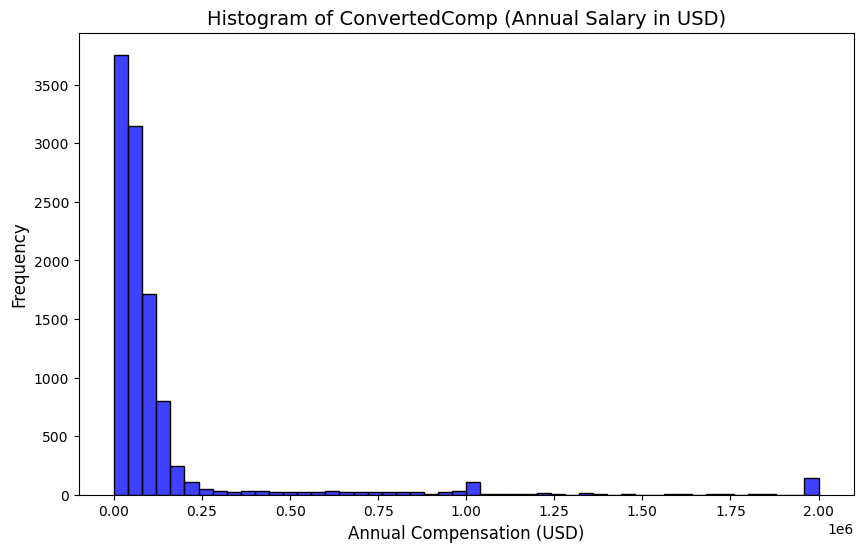

In [12]:
# your code goes here
# Graficar el histograma para la columna 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=50, kde=False, color='blue', edgecolor='black')

# Etiquetas y título
plt.title('Histogram of ConvertedComp (Annual Salary in USD)', fontsize=14)
plt.xlabel('Annual Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Mostrar la gráfica
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print(f"The median of the ConvertedComp column is: {median_converted_comp}")

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [14]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]

print(f"Number of respondents who identified themselves as Man: {man_count}")

Number of respondents who identified themselves as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
# Filtrar a los encuestados que se identificaron como "Woman" y calcular la mediana de 'ConvertedComp'
median_convertedcomp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print(f"The median ConvertedComp of respondents identified as Woman is: {median_convertedcomp_woman}")


The median ConvertedComp of respondents identified as Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
# your code goes here
# Calcular el resumen de cinco números para la columna 'Age'
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Imprimir los resultados
print("Five number summary for the column 'Age':")
print(f"Minimum: {five_number_summary['min']}")
print(f"1st Quartile (Q1): {five_number_summary['25%']}")
print(f"Median: {five_number_summary['50%']}")
print(f"3rd Quartile (Q3): {five_number_summary['75%']}")
print(f"Maximum: {five_number_summary['max']}")


Five number summary for the column 'Age':
Minimum: 16.0
1st Quartile (Q1): 25.0
Median: 29.0
3rd Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


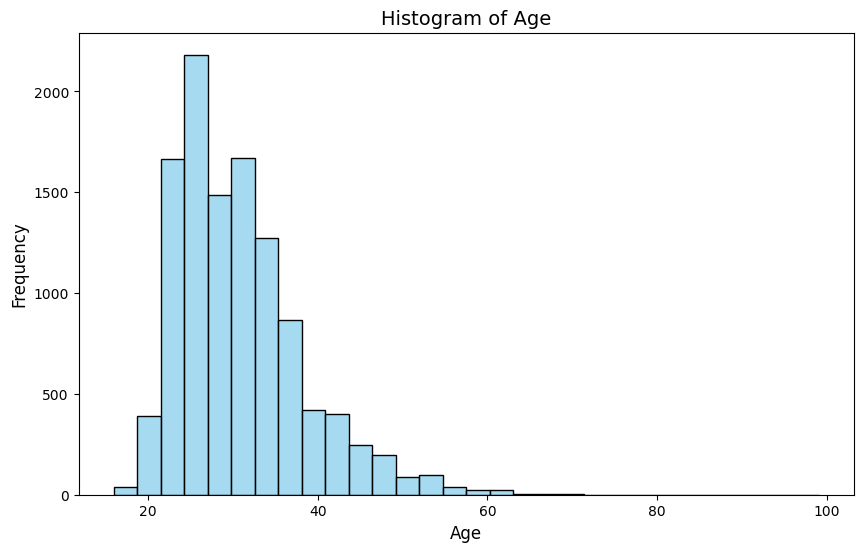

In [17]:
# your code goes here
# Graficar el histograma para la columna 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=False, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Mostrar la gráfica
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


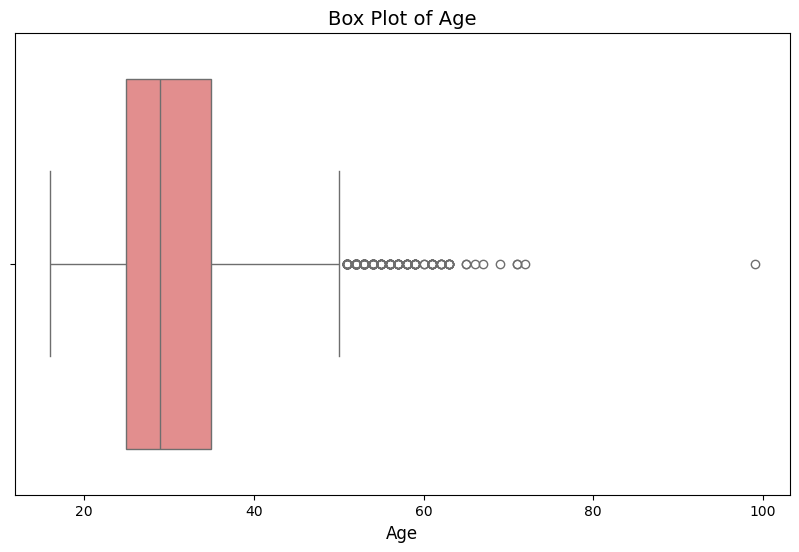

In [18]:
# your code goes here
# Graficar el diagrama de caja para la columna 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'].dropna(), color='lightcoral')

# Etiquetas y título
plt.title('Box Plot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)

# Mostrar la gráfica
plt.show()

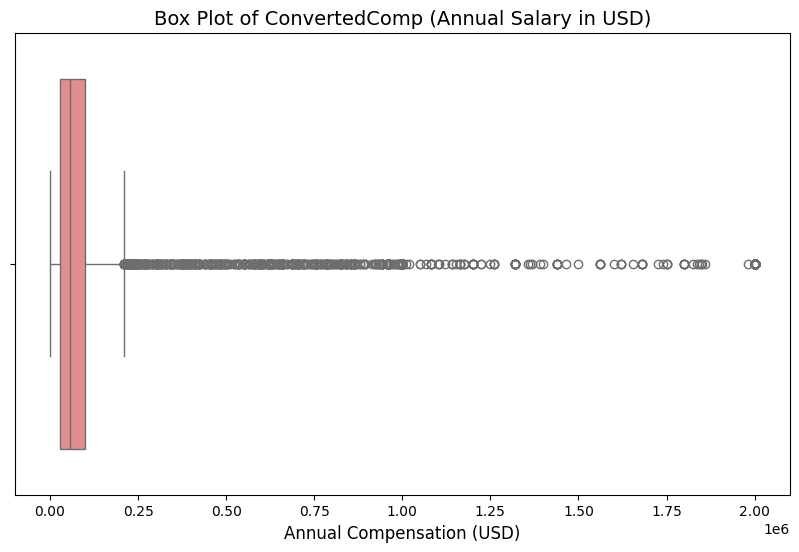

In [19]:
# your code goes here
# Graficar el diagrama de caja para la columna 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'].dropna(), color='lightcoral')

# Etiquetas y título
plt.title('Box Plot of ConvertedComp (Annual Salary in USD)', fontsize=14)
plt.xlabel('Annual Compensation (USD)', fontsize=12)

# Mostrar la gráfica
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
# your code goes here
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para la columna 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

print(f"The Inter Quartile Range (IQR) for the column 'ConvertedComp' is: {IQR}")


The Inter Quartile Range (IQR) for the column 'ConvertedComp' is: 73132.0


Find out the upper and lower bounds.


In [21]:
# your code goes here
# Calcular los límites inferior y superior para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"The lower bound for outliers is: {lower_bound}")
print(f"The upper bound for outliers is: {upper_bound}")

The lower bound for outliers is: -82830.0
The upper bound for outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
# your code goes here
# Identificar los outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Contar el número de outliers
num_outliers = outliers.shape[0]

print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")


The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here
# Crear un nuevo DataFrame sin los outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Imprimir el número de filas en el nuevo DataFrame para verificar
print(f"The number of rows in the DataFrame without outliers is: {df_no_outliers.shape[0]}")

The number of rows in the DataFrame without outliers is: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# your code goes here
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la correlación entre 'Age' y todas las demás columnas numéricas
correlations = numeric_df.corr()

# Extraer la correlación de 'Age' con las demás columnas
age_correlations = correlations['Age']

# Imprimir la correlación de 'Age' con otras columnas numéricas
print("Correlation of 'Age' with other numerical columns:")
print(age_correlations)

Correlation of 'Age' with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
